# Part 1

## Introduction

Before we start, we need to install several additional packages to deal with interactive plots.

To do that, execute the cells below.

In [ ]:
%%capture
%%bash
pip install ipympl
pip install ipywidgets
pip install jupyter_contrib_nbextensions
pip install matplotlib==3.1.3



Import packages.

In [ ]:
%matplotlib inline
#interractive plotting
#%matplotlib widget
import ipywidgets as widgets
import numpy as np

import os
from numpy.linalg import norm

from matplotlib import pyplot as plt
from IPython import display
import matplotlib.ticker as tck
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

If you do not have some package you can use pip install command.

Let us plot the function
$$f(x_1,x_2) = ax_1^2 + bx_2^2.$$


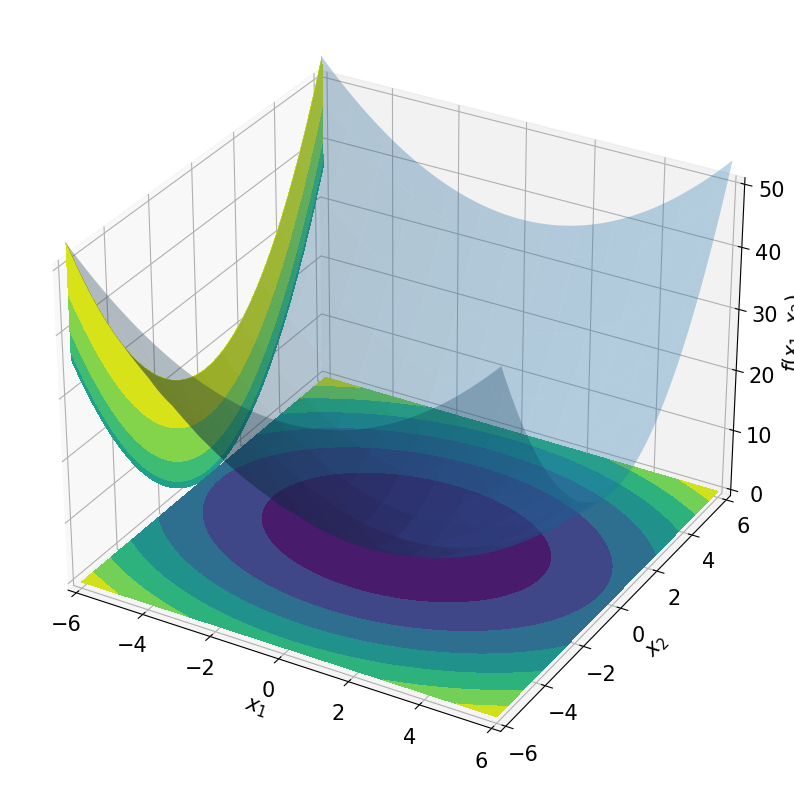

In [ ]:
a = 0.5
b = 1

f = lambda x1, x2: a*x1**2 + b*x2**2
grad_f = lambda x1, x2: np.array([2*a*x1, 2*b*x2])
hess_f = [2*a, 2*b] #in this case hessian is the diagonal matrix

ax = plt.figure().add_subplot(projection='3d')
xmin, xmax = -6,6

zmin, zmax = 0,40
grid = np.linspace(xmin, xmax, 100)
X,Y = np.meshgrid(grid, grid)
Z = np.array([[f(x1,x2)  for x1 in grid]  for x2 in grid] )

# Plot the 3D surface
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)

#ax.plot_wireframe(X, Y, z_ar[i], label=label_ar[i], color=color_ar[i])

ax.contourf(X, Y, Z, zdir='z', offset=zmin, cmap="viridis")
ax.contourf(X, Y, Z, zdir='x', offset=xmin, cmap="viridis")
ax.contourf(X, Y, Z, zdir='y', offset=zmax, cmap="viridis")
size = 15
plt.rcParams['xtick.labelsize'] = size
plt.rcParams['ytick.labelsize'] = size
plt.rcParams['legend.fontsize'] = size
plt.rcParams['axes.titlesize'] = size
plt.rcParams['axes.labelsize'] = size
plt.rcParams["figure.figsize"] = [10,10]
ax.set(xlim=(xmin, xmax), ylim=(xmin, xmax), zlim=(0, 50),
       xlabel=r'$x_1$', ylabel=r'$x_2$', zlabel=r'$f(x_1,x_2)$')


plt.show()

Next, we need to implement Gradient Descent method.

In [ ]:
def gradient_descent(func, func_grad, w0, stepsize, Nsteps=100):
    w_ar = np.zeros ((Nsteps, 2),dtype=float)
    df_ar = np.zeros ((Nsteps, 2), dtype=float)
    func_ar = np.zeros (Nsteps, dtype=float)
    w_ar[0,:] = w0.copy()
    func_ar[0] = func(w0[0],w0[1])
    df_ar[0,:] = func_grad(w0[0], w0[1]).copy()

    w = w0.copy()
    for i in range(1, Nsteps):
        w = w - stepsize * func_grad(w[0], w[1])
        w_ar[i,:] = w.copy()
        df_ar[i,:] = func_grad(w[0], w[1])
        func_ar[i] = func(w[0], w[1])

    return w_ar, func_ar, df_ar



We also implement vizualization function.

In [ ]:
def interactive_plot(nsteps):
    a = 0.2
    b = 1

    f = lambda x1, x2: a*x1**2 + b*x2**2
    grad_f = lambda x1, x2: np.array([2*a*x1, 2*b*x2])

    mu = min (2*a,2*b)
    L = max(2*a,2*b)

    constant_step_size = 2 /(mu + L)

    w1_0 = 5
    w2_0 = 5

    x1_min = x2_min = -6
    x1_max = x2_max = 6
    x1_ar = np.linspace(x1_min, x1_max, 100)
    x2_ar = np.linspace(x2_min, x2_max, 100)
    f_ar = np.array([ np.array([f(w1_, w2_) for w1_ in x1_ar]) for w2_ in x2_ar])
    grad_f_ar = np.array( [ np.array([np.linalg.norm(grad_f(w1_, w2_)) for w1_ in x1_ar]) for w2_ in x2_ar])

    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,7))

    #plt.rcParams["figure.figsize"] = [50,20]
    #fig.canvas.tooalbar_visible = False
    fig.canvas.header_visible = False
    #fig.canvas.footer_visible = False
    c1 = ax1.contourf(x1_ar, x2_ar, f_ar, cmap="viridis")
    plt.colorbar(c1, ax = ax1)
    ax1.set_title(r'$f(x)$')

    c2 = ax2.contourf(x1_ar, x2_ar, grad_f_ar, cmap="viridis")
    plt.colorbar(c2, ax = ax2)
    ax2.set_title(r'$\||\nabla f(x)\||$')
    #fig.set_size_inches(24, 10)

    ws, fs, grad_fs = gradient_descent(f, grad_f, np.array([w1_0, w2_0]), stepsize=constant_step_size, Nsteps=nsteps+1)

    ax1.plot([0],[0],'*',ms = 20, color="orange", label='solution', markeredgecolor="black")
    ax2.plot([0],[0],'*',ms = 20, color="orange", label='solution', markeredgecolor="black")


    ax1.set_xlabel(r'$x_1$')
    ax1.set_ylabel(r'$x_2$')
    ax2.set_xlabel(r'$x_1$')
    ax2.set_ylabel(r'$x_2$')

    print(f'After {nsteps} iterarions GD stopped in [{round(ws[-1, 0], 3),round(ws[-1, 1], 3)}] with function value  f = {round(f(ws[-1, 0], ws[-1, 1]), 3)} ')

    ax1.plot(ws[:,0], ws[:,1], 'ro-',label='GD')
    ax2.plot(ws[:,0], ws[:,1], 'ro-', label='GD')

    ax1.plot([w1_0],[w2_0],'^',ms = 20, color="white", label=r'$x^0$',markeredgecolor="black")
    ax2.plot([w1_0],[w2_0],'^',ms = 20, color="white", label=r'$x^0$',markeredgecolor="black")

    ax1.legend()
    ax2.legend()
    size = 20
    plt.rcParams['xtick.labelsize'] = size  # 40
    plt.rcParams['ytick.labelsize'] = size  # 40
    plt.rcParams['legend.fontsize'] = size  # 30
    plt.rcParams['axes.titlesize'] = size  # 40
    plt.rcParams['axes.labelsize'] = size  # 40s

    #fig.suptitle(f'Gradient with constant stepsize; {nsteps} steps; stepsize = {round(constant_step_size, 4)}')

    plt.show()

    #FuncAnimation(f, update, frames=range(nsteps), interval=120,init_func=init, blit=True)

Plotting results.

In [ ]:
# @title
widgets.interactive(interactive_plot, nsteps=widgets.IntSlider(min=0, max=30, value=0, step=1))

interactive(children=(IntSlider(value=0, description='nsteps', max=30), Output()), _dom_classes=('widget-inter…

## Exercise 1

Run this method for different step sizes (constant_step_size). You can try $\gamma_* ,\frac{\gamma_*}{2} , \frac{\gamma_*}{4},\frac{\gamma_*}{8}$ and $2\gamma_*$,   where $\gamma_* = \frac{2}{\mu+L}$ is theoretically optimal stepsize (you can find it in example above).

How does the speed of convergence (number of steps needed to find solution) depend on step size? Try to find the largest possible step size that preserves convergence.

## Exercise 2

Set different parameters $a$ and $b$ for function
$$f(x_1,x_2) = ax_1^2+bx_2^2.$$


You can try $a = 0.1, 0.2, 0.5, 1$ and $b = 0.1, 0.2, 0.5, 1$.
How does the convergence speed (number of steps needed to find solution) depend on $a$ and $b$? How does the convergence speed vary in case $a=0.2, b=0.2$ and $a = 0.5, b = 0.5$?

## Exercise 3

Set different initial points (w1_0, w2_0) and run the method. How does the number of steps depend on the initial point?



#Part 2

## Linear Regression

In this section we consider classical linear regression problem (Least Squares).



Let $\boldsymbol{A} \in \mathbb{R}^{n \times d}$ and $b \in \mathbb{R}^n$. Let $f(x)=\frac{1}{2 n}\|\boldsymbol{A} x-b\|^2$ and it is convex function on $\mathbb{R}^d$. To run Gradient Descent method we need to fill blank lines in the implementation of the function f(), grad_f(), hess_f() below. Hessian will used for finding theoretical stepsize.





Import packages.

In [ ]:
%matplotlib inline

from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sklearn
from sklearn.datasets import make_regression

import warnings
warnings.filterwarnings("ignore")

This is the function for plotting results.

In [ ]:

def plot(x_ar, y_ar, title, xaxis, yaxis, xlims, ylims, markevery_number, legend_loc="upper right"):
    size = 20
    marker_size = 10
    fig = plt.figure()
    #fig.canvas.tooalbar_visible = False
    fig.canvas.header_visible = False
    #fig.canvas.footer_visible = False
    # plt.rcParams['font.family'] = 'serif'
    # plt.rcParams['font.serif'] = 'FreeSerif'
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.markersize'] = marker_size
    plt.rcParams['xtick.labelsize'] = size  # 40
    plt.rcParams['ytick.labelsize'] = size  # 40
    plt.rcParams['legend.fontsize'] = size  # 30
    plt.rcParams['axes.titlesize'] = size  # 40|
    plt.rcParams['axes.labelsize'] = size  # 40s
    plt.rcParams["figure.figsize"] = [13,9]
    plt.yscale('log')
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.grid()

    plt.title(title)

    plt.plot(x_ar, y_ar, label="GD", color="blue", marker='o', markeredgecolor="black", markevery = markevery_number)
    legend = plt.legend(loc=legend_loc, framealpha=0.5)

    plt.show()








### Exercise 1
Implement functions f(), grad_f() and hess_f().

In [1]:
def f(x, A, b):
    n = A.shape[0]
    # your code here
    func =
    return func

def grad_f(x,A,b):
    n = A.shape[0]
    # your code here
    grad =
    return grad

def hess_f(A):
    n = A.shape[0]
    # your code here
    hess =
    return hess

SyntaxError: ignored

Now we can use implemented functions in Gradient Descent method.

In [ ]:
def gradient_descent(x0, A, b, stepsize, Nsteps=10):
    func_values = []
    x = x0.copy()
    func_values = [f(x,A,b)]
    iterations = [0]
    for i in range(1, Nsteps):
        x = x - stepsize * grad_f(x,A,b)
        func_values.append(f(x,A,b))

        iterations.append(i)
    return x, iterations, func_values

We are ready to do experiments. We can vary dimension of the problem and size of sythetic dataset. Also we can vary number of iterations.

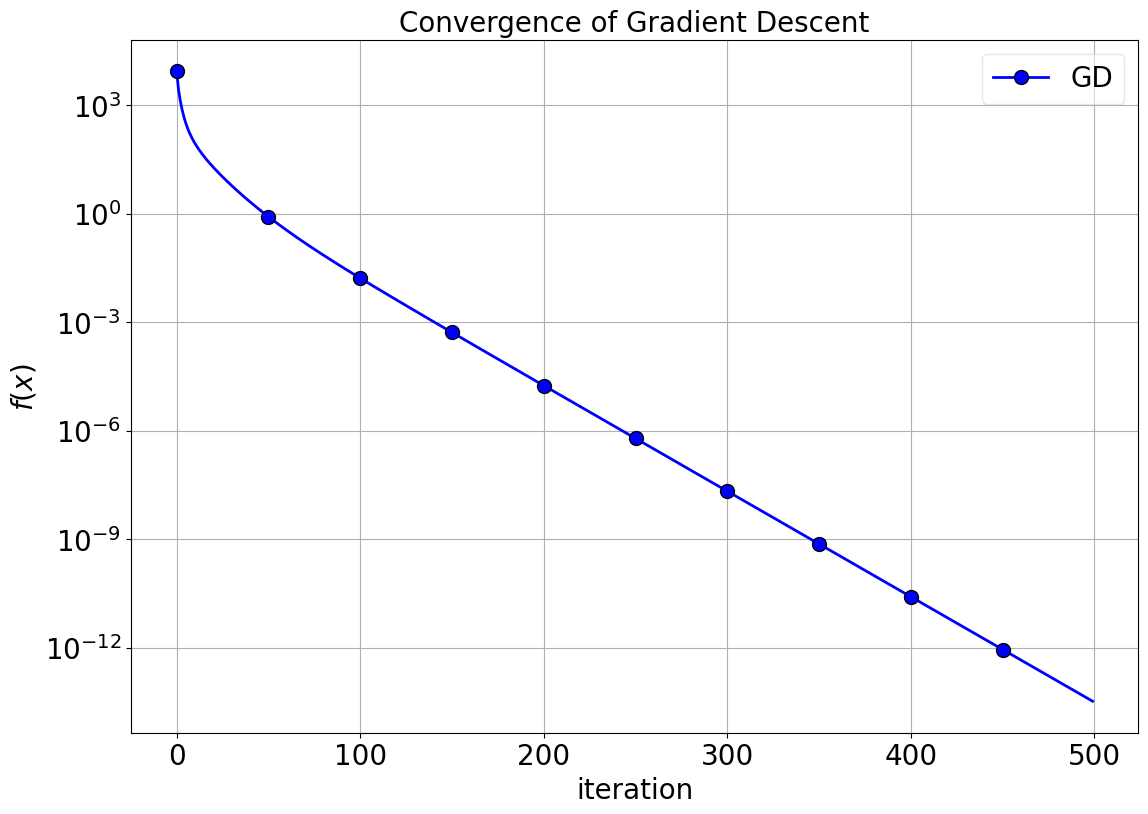

In [ ]:
dim = 100
n_rows_A = 200
A,b = sklearn.datasets.make_regression (n_samples=n_rows_A, n_features=dim)
lambda_reg = 1/n_rows_A
L = np.max(np.linalg.eigvals(hess_f(A)))
stepsize = 1/L

x0 = np.random.uniform(low=0,high=1,size=dim)
Nsteps = 500
x_solution, iterations, func_values = gradient_descent(x0, A, b, stepsize, Nsteps)
markevery_num = Nsteps//10

xmin,xmax = 0, iterations[-1]+5
ymin,ymax = func_values[-1], func_values[0]*1.1
warnings.filterwarnings('ignore')
plot(x_ar=iterations, y_ar=(func_values), title="Convergence of Gradient Descent", xaxis="iteration", yaxis=r"$f(x)$", xlims=(xmin,xmax), ylims=(ymin,ymax), markevery_number = markevery_num, legend_loc="upper right")


### Exercise 2.

1) Do experiments with different choices of stepsizes and compare results. Try to find the largest stepsize that preserves convergence.

2) Do experiments with different choices of dimensions and sizes of dataset. How does convergence speed depend on them?

3) Do experiments with different choices of initial points. What can you say about convergence speed?

4) What is the lowest function value you can obtain?